# HW1

### 1. Bayesian Bandit Algorithm 
Prior Setup:

In [11]:
from scipy import stats
stats.binom(n=1,p=0.5).rvs(size=1)
import matplotlib.pyplot as plt
import numpy as np

# Function to update the posterior distribution (Beta distribution)
def update_posterior(alpha, beta, successes, failures):
    updated_alpha = alpha + successes
    updated_beta = beta + failures
    return updated_alpha, updated_beta

# Function to sample from the posterior distribution
def sample_from_posterior(alpha, beta, num_samples=1):
    return np.random.beta(alpha, beta, size=num_samples)

# Function to visualize Beta distributions
def plot_beta_distribution(alpha, beta, label):
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, a=alpha, b=beta)
    plt.plot(x, y, label=label)

# Prior parameters
alpha_prior, beta_prior = 1, 1

Data Collection and Update:

In [17]:
# Simulate data for each option
n_red, x_red = 10, 7  # For the "Red" option
n_blue, x_blue = 10, 5  # For the "Blue" option
n_other, x_other = 10, 8  # For the "Other" option

# Initialize posterior parameters for each option
alpha_red, beta_red = update_posterior(alpha_prior, beta_prior, x_red, n_red - x_red)
alpha_blue, beta_blue = update_posterior(alpha_prior, beta_prior, x_blue, n_blue - x_blue)
alpha_other, beta_other = update_posterior(alpha_prior, beta_prior, x_other, n_other - x_other)

Visualization:

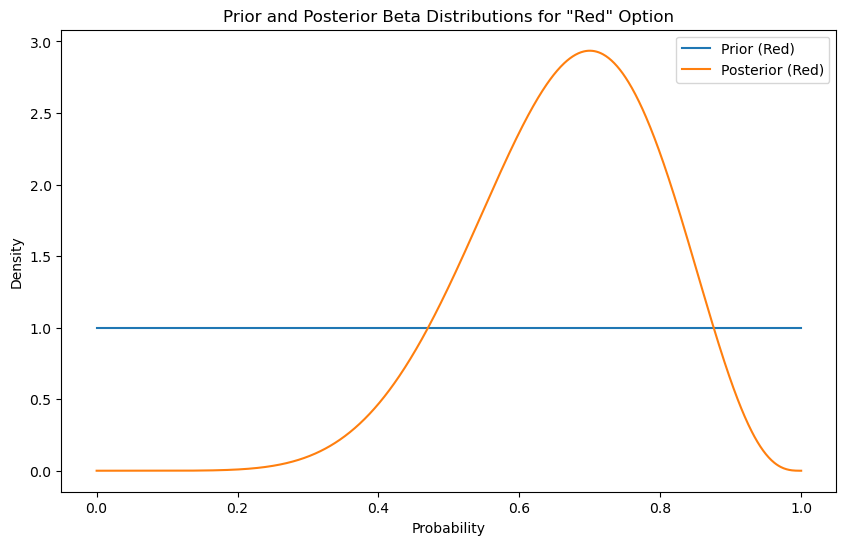

In [18]:
# Visualize the prior and posterior Beta distributions for "Red"
plt.figure(figsize=(10, 6))

# Prior distribution
plot_beta_distribution(alpha_prior, beta_prior, 'Prior (Red)')

# Posterior distribution after observing data
plot_beta_distribution(alpha_red, beta_red, 'Posterior (Red)')

# Display the plot
plt.legend()
plt.title('Prior and Posterior Beta Distributions for "Red" Option')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

###  2. Choosing the Next Option

Simulation for Relative Beliefs:

In [19]:
# Simulate the Bayesian Bandit algorithm for all three options
num_simulations = 1000

beliefs = []

for _ in range(num_simulations):
    # Sample from the posterior distributions for all options
    sampled_values_red = sample_from_posterior(alpha_red, beta_red)
    sampled_values_blue = sample_from_posterior(alpha_blue, beta_blue)
    sampled_values_other = sample_from_posterior(alpha_other, beta_other)

    # Calculate the relative beliefs (probabilities) for each option being the best
    belief_red = np.mean(sampled_values_red > sampled_values_blue)
    belief_blue = np.mean(sampled_values_blue > sampled_values_red)
    belief_other = np.mean(sampled_values_other > sampled_values_red)

    beliefs.append((belief_red, belief_blue, belief_other))

# Display the average relative beliefs
average_beliefs = np.mean(beliefs, axis=0)
print("Average Relative Beliefs (Red, Blue, Other):", average_beliefs)

Average Relative Beliefs (Red, Blue, Other): [0.826 0.174 0.685]


### 3. Exploration vs. Exploitation:

In [20]:
# Choose the next option for data collection
next_option = np.argmin(average_beliefs)
print("Next Option for Data Collection:", next_option)

Next Option for Data Collection: 1
